In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# get all years
start_year = 2017
stop_year = 2022

year_list = [str(i) for i in range(start_year, stop_year+1)]

# get all regions
path = './data/2017_country_weekly_2017_US_weekly_symptoms_dataset.csv'
example_data = pd.read_csv(path)
region_data = example_data['sub_region_1_code'].fillna('US-X').to_numpy()

region_list = np.unique(region_data).tolist()

# get subset of all symptoms
symptom_list = [
    'symptom:Anxiety', 'symptom:Asthma', 'symptom:Anosmia', 'symptom:Alcoholism',
    'symptom:Common cold', 'symptom:Cough', 'symptom:Depression', 'symptom:Fatigue',
    'symptom:Fever', 'symptom:Headache', 'symptom:Nausea', 'symptom:Shortness of breath'
]

# generate all data dict 
data_dict = {}

for year in year_list:
    path = './data/{}_country_weekly_{}_US_weekly_symptoms_dataset.csv'.format(year,year)
    year_data = pd.read_csv(path)
    year_data['sub_region_1_code'] = year_data['sub_region_1_code'].fillna('US-X')

    for region in region_list:
        region_data = year_data.loc[year_data['sub_region_1_code'] == region]
        symptom_data = region_data[symptom_list]

        for symptom in symptom_list:
            try:
                data_dict[region][symptom] = np.concatenate((data_dict[region][symptom], symptom_data[symptom].to_numpy()))
            except:
                try:
                    data_dict[region][symptom] = symptom_data[symptom].to_numpy()
                except:
                    data_dict[region] = {}
                    data_dict[region][symptom] = symptom_data[symptom].to_numpy()

In [8]:
# create event mark
thres = 1.02
event_mark = {}

for region in data_dict.keys():
    if region not in event_mark.keys():
        event_mark[region] = {}

    for symptom in data_dict[region].keys():
        if symptom not in event_mark[region].keys():
            event_mark[region][symptom] = []
        symptom_data = data_dict[region][symptom]

        for i,s in enumerate(symptom_data[:-1]):
            if thres * symptom_data[i] <= symptom_data[i+1]:
                event_mark[region][symptom].append(i+1)

l_list = []

for region in event_mark.keys():
    temp_l = []
    for symptom in event_mark[region].keys():
        temp_l.append(len(event_mark[region][symptom]))
    l_list.append(temp_l)

    print('Num of Events in {}: {}'.format(region, sum(temp_l)))

Num of Events in US-AK: 1206
Num of Events in US-AL: 1064
Num of Events in US-AR: 1126
Num of Events in US-AZ: 1015
Num of Events in US-CA: 970
Num of Events in US-CO: 1019
Num of Events in US-CT: 1085
Num of Events in US-DC: 1183
Num of Events in US-DE: 1133
Num of Events in US-FL: 954
Num of Events in US-GA: 1019
Num of Events in US-HI: 1153
Num of Events in US-IA: 1143
Num of Events in US-ID: 1102
Num of Events in US-IL: 1009
Num of Events in US-IN: 1060
Num of Events in US-KS: 1124
Num of Events in US-KY: 1056
Num of Events in US-LA: 1068
Num of Events in US-MA: 1033
Num of Events in US-MD: 1028
Num of Events in US-ME: 1177
Num of Events in US-MI: 1043
Num of Events in US-MN: 1079
Num of Events in US-MO: 1048
Num of Events in US-MS: 1121
Num of Events in US-MT: 1149
Num of Events in US-NC: 1040
Num of Events in US-ND: 1188
Num of Events in US-NE: 1138
Num of Events in US-NH: 1129
Num of Events in US-NJ: 997
Num of Events in US-NM: 1142
Num of Events in US-NV: 1080
Num of Events in 

In [9]:
l_list = np.array(l_list)
print('The numbers of events for each symptom are: \n{}'.format(np.sum(l_list, axis=0)))
print('The most common events is: {}'.format(symptom_list[np.argmax(np.sum(l_list, axis=0))]))
print('The least common events is: {}'.format(symptom_list[np.argmin(np.sum(l_list, axis=0))]))

The numbers of events for each symptom are: 
[4011 4918 4968 4072 5599 5532 4648 4039 5384 3660 4166 5008]
The most common events is: symptom:Common cold
The least common events is: symptom:Headache


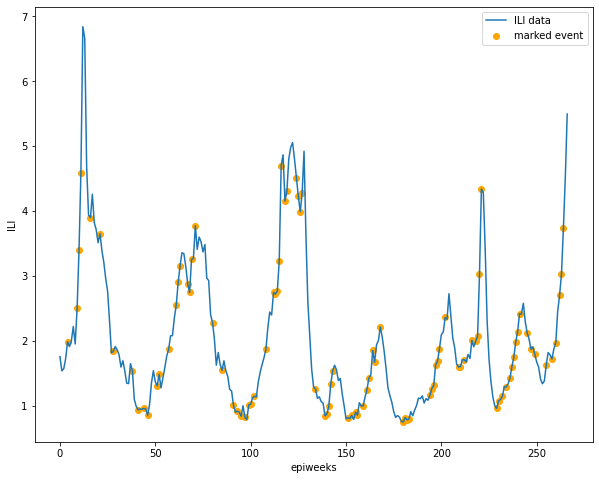

In [12]:
path = './data/ILINet_state.csv'
flu_data = pd.read_csv(path, skiprows=1)

region_flu_data = flu_data.loc[flu_data['REGION'] == 'California']['%UNWEIGHTED ILI'].to_numpy().astype(float)

temp = event_mark['US-CA']['symptom:Fever']
# symptom record is 7 weeks ahead of flu record
temp = np.array(temp) - 7
temp = temp[temp>=0]


plt.figure(figsize=(10,8))
plt.plot(region_flu_data, label='ILI data')
plt.scatter(temp[2:], region_flu_data[temp[2:]], color='orange', label='marked event')
plt.xlabel('epiweeks')
plt.ylabel('ILI')
plt.legend(loc='best')
plt.show()